<a href="https://colab.research.google.com/github/Vidyadhar4240/SentimentalAnaysis/blob/master/ImageToCartoon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving Girl.jpg to Girl.jpg


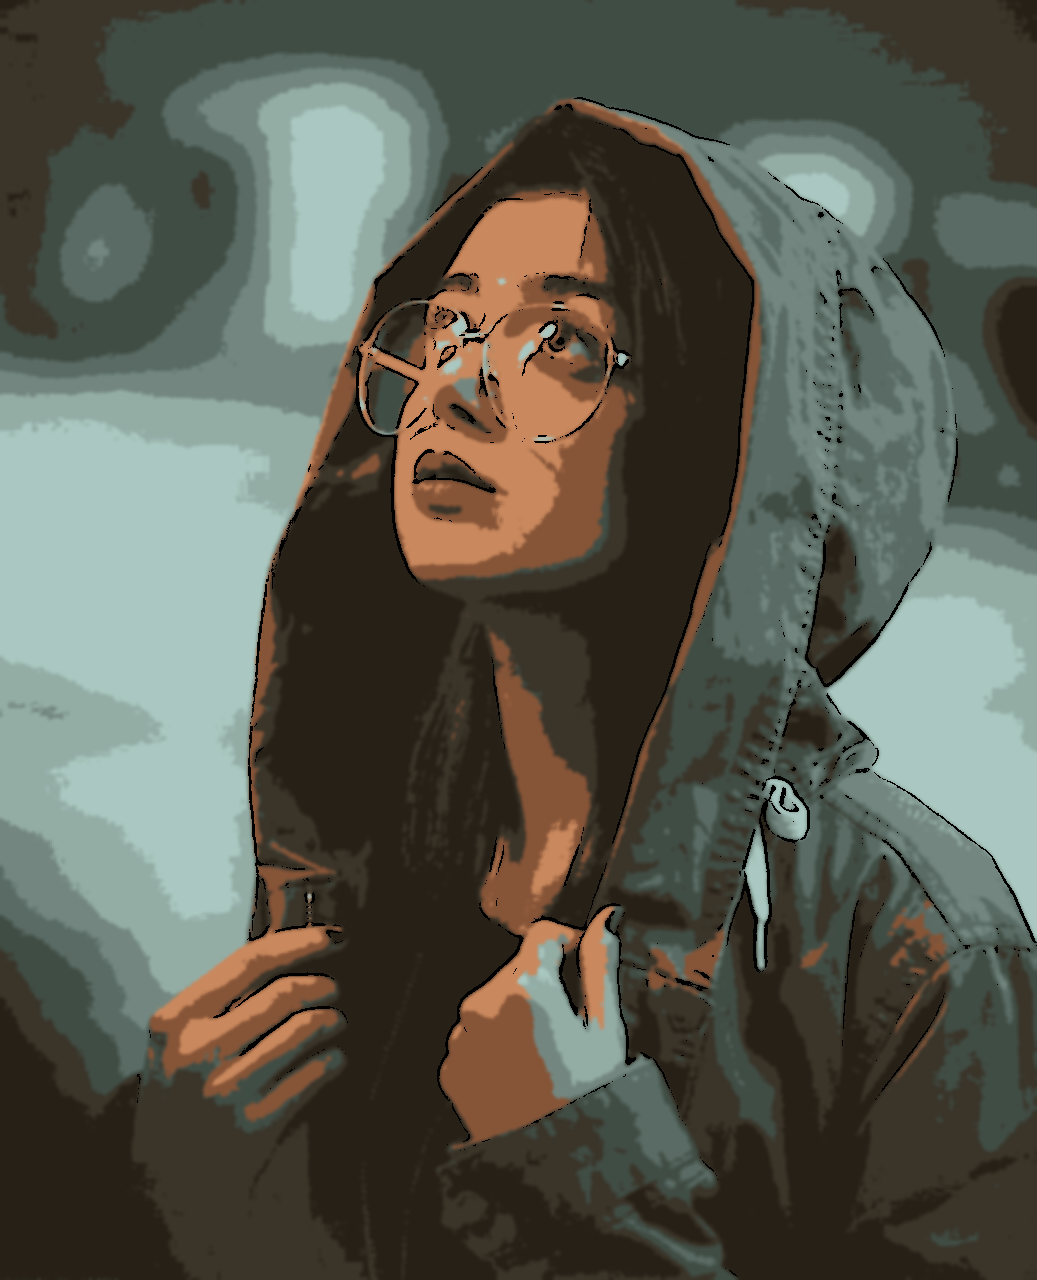

In [ ]:
import cv2
import numpy as np

from google.colab.patches import cv2_imshow
from google.colab import files

def readfile(filename):
  img = cv2.imread(filename)
  #cv2_imshow(img)
  return img

uploaded = files.upload()
filename = next(iter(uploaded))
img = readfile(filename)

def edge_mask(img, line_size, blur_value):
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  gray_blur = cv2.medianBlur(gray, blur_value)
  edges = cv2.adaptiveThreshold(gray_blur, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, line_size, blur_value)
  return edges

line_size = 7
blur_value = 7

edges = edge_mask(img, line_size, blur_value)
#cv2_imshow(edges)

#Color Quantisation
def color_quantization(img, k):
  #Transforms image
  data = np.float32(img).reshape((-1,3))
  
  #Determine Criteria
  criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 20, 0.01)

  #Implementing K-Means
  ret, label, center = cv2.kmeans(data, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
  center = np.uint8(center)
  result = center[label.flatten()]
  result = result.reshape(img.shape)
  return result

total_color = 9
img = color_quantization(img, total_color)
#cv2_imshow(img)

#Bilateral Filter
blurred = cv2.bilateralFilter(img, d=7, sigmaColor=200, sigmaSpace=200)

#Combined Edge Mask and Colored image
cartoon = cv2.bitwise_and(blurred, blurred, mask=edges)
cv2_imshow(cartoon)